*After days of learning about object detectiona and cnns , I spent many days implementing and removing errors . The task invloves multi-class and multi bboxes.After days of trying to implement this multi-problem , I had trouble with multiple bounding boxes . Finally I dedicded only to implement multi-class .Still, one error I couldn't resolve. So till whatever endpoint I reached , I have uploaded the file :)*

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:

(ds_train,ds_test), info = tfds.load('voc', with_info=True, split=['train','test'])

In [3]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'labels': Sequence(ClassLabel(shape=(), dtype=int64, num_classes=20)),
    'labels_no_difficult': Sequence(ClassLabel(shape=(), dtype=int64, num_classes=20)),
    'objects': Sequence({
        'bbox': BBoxFeature(shape=(4,), dtype=float32),
        'is_difficult': bool,
        'is_truncated': bool,
        'label': ClassLabel(shape=(), dtype=int64, num_classes=20),
        'pose': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
})

(480, 389, 3)
tf.Tensor(b'007308.jpg', shape=(), dtype=string)
tf.Tensor([12 14], shape=(2,), dtype=int64)
tf.Tensor([12 14 12 14], shape=(4,), dtype=int64)
tf.Tensor([0.14375    0.0437018  0.97083336 0.7763496 ], shape=(4,), dtype=float32)
tf.Tensor([0.14583333 0.24164525 0.57916665 0.6066838 ], shape=(4,), dtype=float32)
tf.Tensor([0.6        0.5244216  0.8541667  0.76606685], shape=(4,), dtype=float32)
tf.Tensor([0.56041664 0.5012854  0.7395833  0.6863753 ], shape=(4,), dtype=float32)


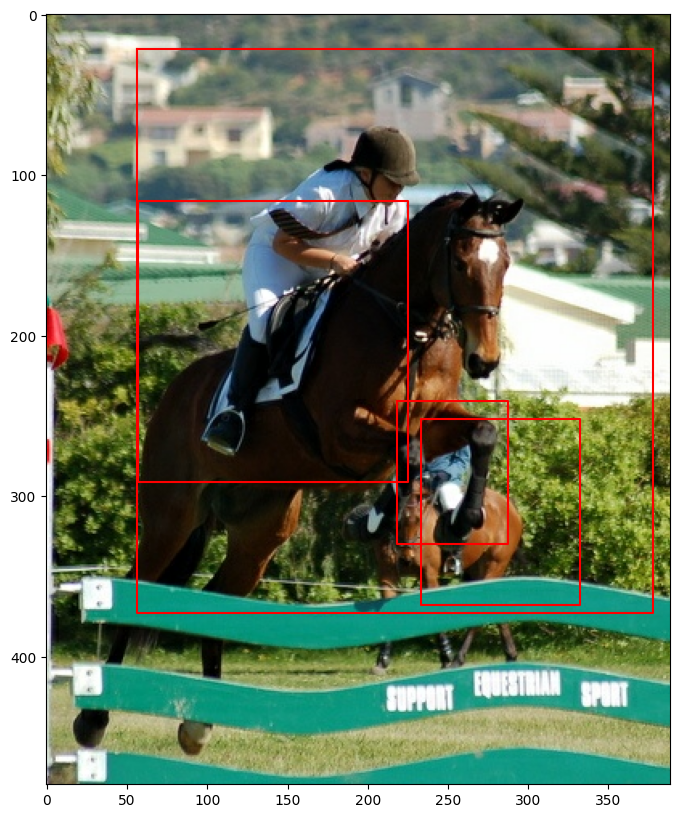

In [4]:
sample = next(iter(ds_train.take(1)))
ample = sample
image, bboxes = ample['image'], ample['objects']['bbox']
print(ample['image'].shape)
print(ample['image/filename'])
print(ample['labels'])
print(ample['objects']['label'])

plt.figure(figsize=(10,10))
plt.axis('on')
plt.imshow(image)

image_width = ample['image'].shape[1]
image_height = ample['image'].shape[0]

for bbox in bboxes:
  print(bbox)
  xmin, ymin, xmax, ymax = bbox
  xmin = xmin * image_width
  ymin = ymin * image_height
  xmax = xmax * image_width
  ymax = ymax * image_height
  plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], c='red')

plt.show()


In [5]:
def preprocess(data):
  img = tf.image.resize(data["image"], (224,224))
  img = img / 255.0
  #img = tf.expand_dims(data['image'], axis=0)
  label = data['objects']['label']
  return img, label #,data['objects']['bbox']

In [6]:
ds_train = ds_train.map(preprocess).batch(32)
ds_test = ds_test.map(preprocess).batch(32)

In [7]:
# Load the ResNet50 model with ImageNet weights.
model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the convolutional layers in the model.
model.trainable = False

# Add a new top layer for classification.
x = tf.keras.layers.Flatten()(model.output)
x = tf.keras.layers.Dense(20, activation='softmax')(x)

# Create a new model with the ResNet50 and the new top layer.
model = tf.keras.models.Model(inputs=model.input, outputs=x)

# Compile the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:

# Train the model on the training data.
model.fit(ds_train,epochs=5)


Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node IteratorGetNext defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-8-f2c75a1ee292>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1383, in step_function

Cannot add tensor to the batch: number of elements does not match. Shapes are: [tensor]: [2], [batch]: [4]
	 [[{{node IteratorGetNext}}]] [Op:__inference_train_function_9125]

In [ ]:

# Evaluate the model on the test data.
model.evaluate(ds_test)
